<a href="https://colab.research.google.com/github/lpatel29/Major-Project--DS/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102257 entries, 0 to 102256
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               102257 non-null  object 
 1   continent                              97480 non-null   object 
 2   location                               102257 non-null  object 
 3   date                                   102257 non-null  object 
 4   total_cases                            98393 non-null   float64
 5   new_cases                              98390 non-null   float64
 6   new_cases_smoothed                     97380 non-null   float64
 7   total_deaths                           88177 non-null   float64
 8   new_deaths                             88333 non-null   float64
 9   new_deaths_smoothed                    97380 non-null   float64
 10  total_cases_per_million                97870 non-null   

# 1. PREPROCESSING

In [5]:
df.drop(['reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality'],axis=1,inplace=True)
df.drop(['new_cases_smoothed','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million'],axis=1,inplace=True)
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [7]:
#renaming date as ds
df = df.rename(columns= {df.columns[3]:'ds'})
#converting date as timestamp
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
print(min(df.ds))
print(max(df.ds))

2020-01-01 00:00:00
2021-07-13 00:00:00


## Continentwise New Cases

Text(0.5, 1.0, 'Continent wise Covid-19 New Cases')

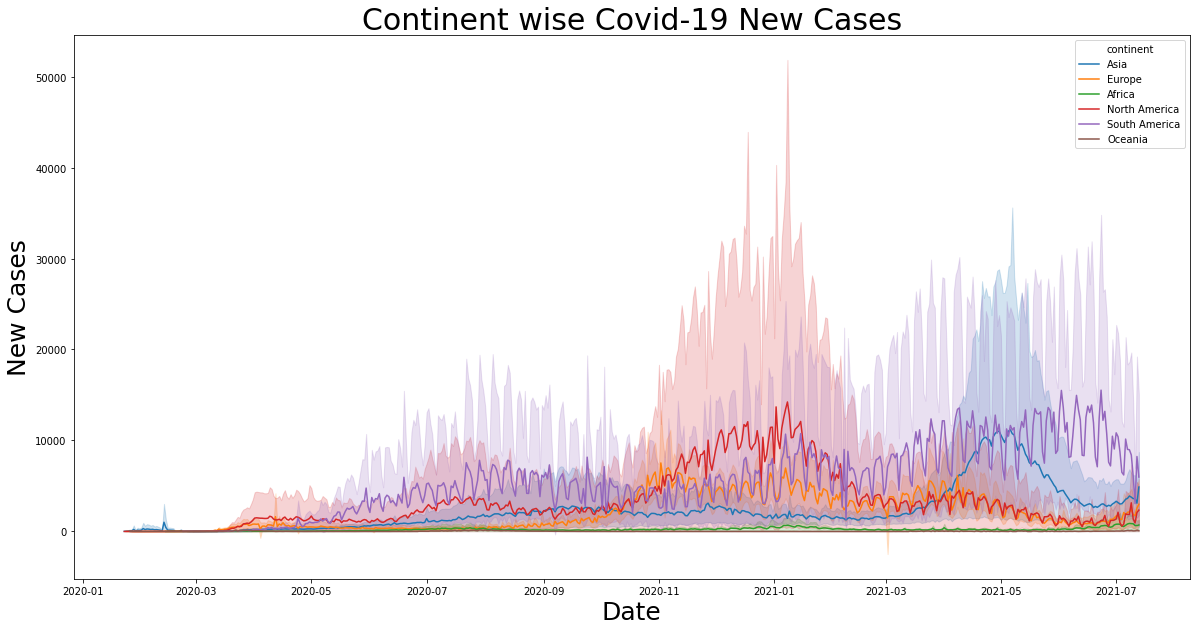

In [9]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y = "new_cases",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("New Cases", size=25)
plt.title("Continent wise Covid-19 New Cases", size=30)

## Continentwise Total Cases

Text(0.5, 1.0, 'Continent wise Covid-19 Total Cases')

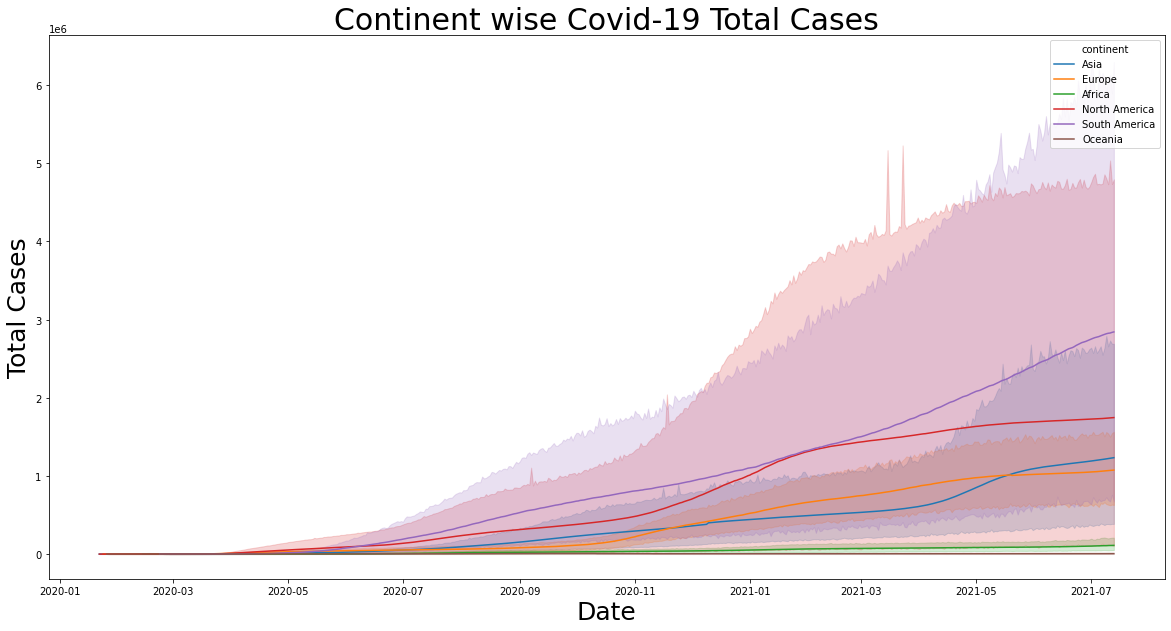

In [10]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y = "total_cases",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Total Cases", size=25)
plt.title("Continent wise Covid-19 Total Cases", size=30)

## Continentwise Total Tests

Text(0.5, 1.0, 'Continent wise Covid-19 Total Tests')

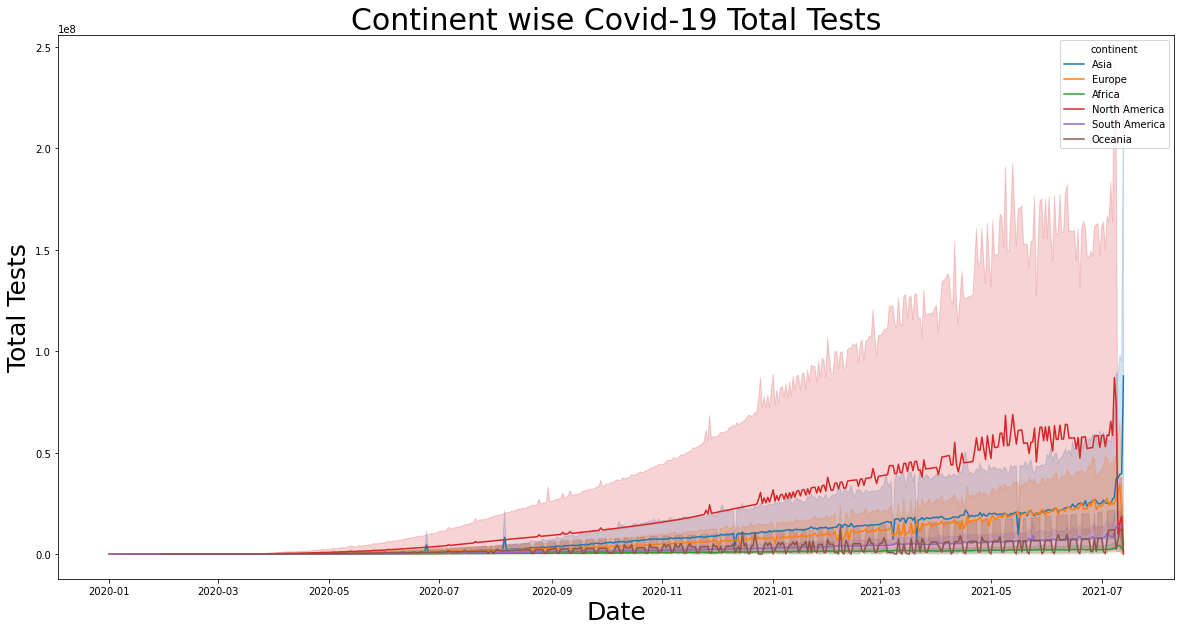

In [11]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds",y = "total_tests",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Total Tests", size=25)
plt.title("Continent wise Covid-19 Total Tests", size=30)

## Continentwise Total Deaths

Text(0.5, 1.0, 'Continent wise Covid-19 Total Deaths')

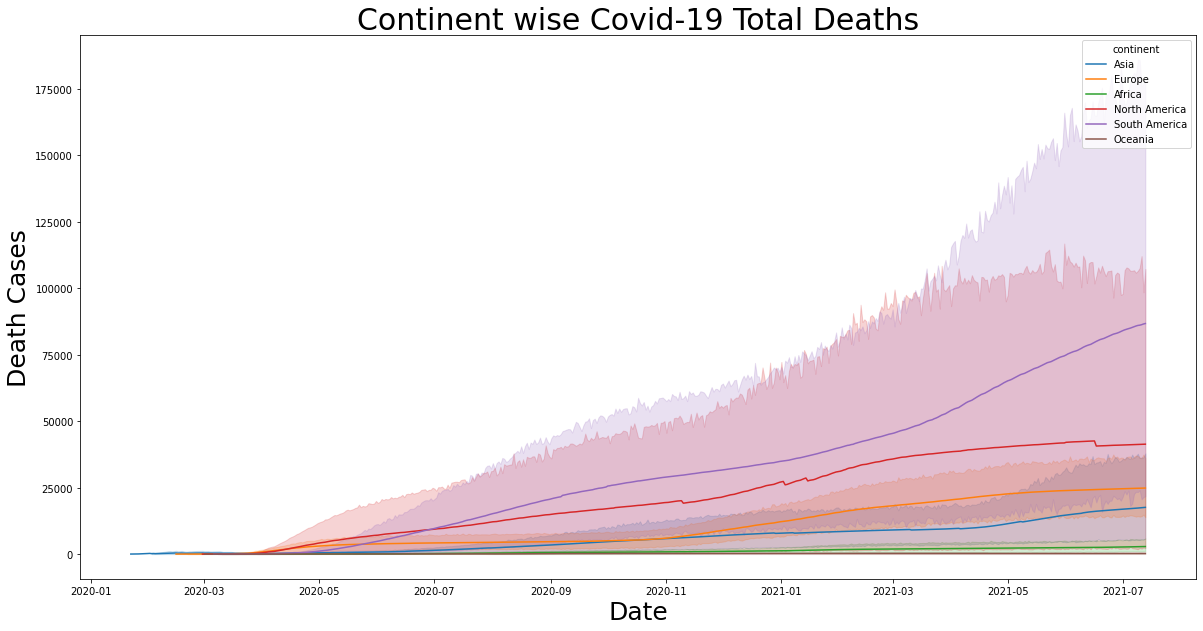

In [12]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds",y = "total_deaths",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Death Cases", size=25)
plt.title("Continent wise Covid-19 Total Deaths", size=30)

## Continentwise Total Vaccinations

Text(0.5, 1.0, 'Continent wise Covid-19 Total Vaccinations')

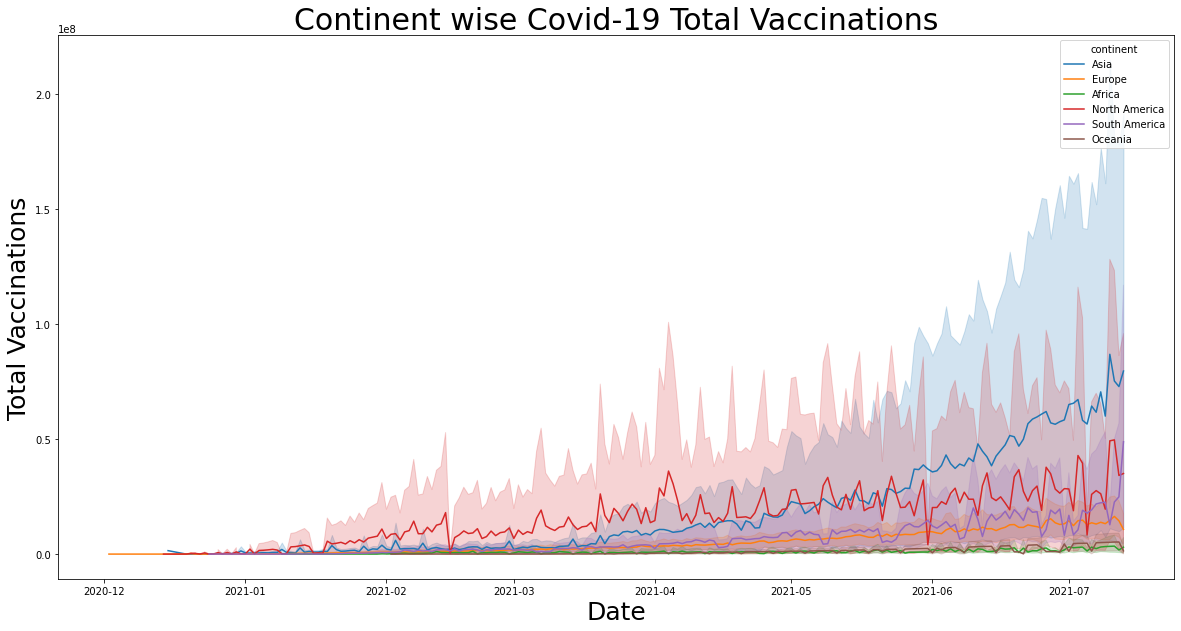

In [13]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y="total_vaccinations",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Total Vaccinations", size=25)
plt.title("Continent wise Covid-19 Total Vaccinations", size=30)

# COUNTRY WISE ANALYSIS
PREPROCESSING:

1.   DELETING -VE VALUES
2.   LISTING TOP 10 COUNTRIES WITH RESPECT TO TOTAL CASES, DEATHS, VACCINATED




In [14]:
topdf = df[['ds','iso_code','continent','location','total_tests','total_cases','total_deaths','total_vaccinations']]
topdf.head()
df1 = topdf.copy()
df1

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
0,2020-02-24,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
1,2020-02-25,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
2,2020-02-26,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
3,2020-02-27,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
4,2020-02-28,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
102252,2021-07-09,ZWE,Africa,Zimbabwe,NaN,65066.0,2084.0,1464065.0
102253,2021-07-10,ZWE,Africa,Zimbabwe,NaN,66853.0,2126.0,NaN
102254,2021-07-11,ZWE,Africa,Zimbabwe,NaN,67765.0,2185.0,1491397.0
102255,2021-07-12,ZWE,Africa,Zimbabwe,NaN,70426.0,2236.0,1531868.0


In [15]:
df1.nlargest(1,['total_deaths']) # gives world data

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
100832,2021-07-13,OWID_WRL,NaN,World,NaN,187794140.0,4048746.0,3.505642e+09


In [16]:
df2 = df1.copy().dropna(subset=['continent'])
df2

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
0,2020-02-24,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
1,2020-02-25,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
2,2020-02-26,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
3,2020-02-27,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
4,2020-02-28,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
102252,2021-07-09,ZWE,Africa,Zimbabwe,NaN,65066.0,2084.0,1464065.0
102253,2021-07-10,ZWE,Africa,Zimbabwe,NaN,66853.0,2126.0,NaN
102254,2021-07-11,ZWE,Africa,Zimbabwe,NaN,67765.0,2185.0,1491397.0
102255,2021-07-12,ZWE,Africa,Zimbabwe,NaN,70426.0,2236.0,1531868.0


## Finding most test cases country

In [17]:
df2.nlargest(5,['total_cases']) # Most cases in United States

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
97440,2021-07-13,USA,North America,United States,NaN,33914880.0,607771.0,334942236.0
97439,2021-07-12,USA,North America,United States,NaN,33888961.0,607399.0,334600770.0
97438,2021-07-11,USA,North America,United States,NaN,33853948.0,607156.0,334151648.0
97437,2021-07-10,USA,North America,United States,NaN,33847784.0,607132.0,333565404.0
97436,2021-07-09,USA,North America,United States,474252139.0,33838746.0,606993.0,332966409.0


In [18]:
df2.nlargest(5,['total_deaths'],keep = "all") # Most deaths in United States

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
97440,2021-07-13,USA,North America,United States,NaN,33914880.0,607771.0,334942236.0
97439,2021-07-12,USA,North America,United States,NaN,33888961.0,607399.0,334600770.0
97438,2021-07-11,USA,North America,United States,NaN,33853948.0,607156.0,334151648.0
97437,2021-07-10,USA,North America,United States,NaN,33847784.0,607132.0,333565404.0
97436,2021-07-09,USA,North America,United States,474252139.0,33838746.0,606993.0,332966409.0


In [19]:
df2.nlargest(5,['total_vaccinations']) # Most vaccinated in China

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
19752,2021-07-13,CHN,Asia,China,NaN,92174.0,4636.0,1.402019e+09
19751,2021-07-12,CHN,Asia,China,NaN,92150.0,4636.0,1.391432e+09
19750,2021-07-11,CHN,Asia,China,NaN,92121.0,4636.0,1.382482e+09
19749,2021-07-10,CHN,Asia,China,NaN,92070.0,4636.0,1.374162e+09
19748,2021-07-09,CHN,Asia,China,NaN,92070.0,4636.0,1.365463e+09


## Finding smallest country

In [20]:
df3 = df2.copy()
df3

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
0,2020-02-24,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
1,2020-02-25,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
2,2020-02-26,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
3,2020-02-27,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
4,2020-02-28,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
102252,2021-07-09,ZWE,Africa,Zimbabwe,NaN,65066.0,2084.0,1464065.0
102253,2021-07-10,ZWE,Africa,Zimbabwe,NaN,66853.0,2126.0,NaN
102254,2021-07-11,ZWE,Africa,Zimbabwe,NaN,67765.0,2185.0,1491397.0
102255,2021-07-12,ZWE,Africa,Zimbabwe,NaN,70426.0,2236.0,1531868.0


In [21]:
print(min(df3.ds))
print(max(df3.ds))

2020-01-01 00:00:00
2021-07-13 00:00:00


In [22]:
df4 = df2[(df2['ds'] >= '2021-07-13 00:00:00') ]

In [23]:
df4

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
505,2021-07-13,AFG,Asia,Afghanistan,NaN,134653.0,5791.0,NaN
1527,2021-07-13,ALB,Europe,Albania,NaN,132608.0,2456.0,1035667.0
2032,2021-07-13,DZA,Africa,Algeria,NaN,147883.0,3867.0,NaN
2531,2021-07-13,AND,Europe,Andorra,NaN,14167.0,127.0,NaN
3012,2021-07-13,AGO,Africa,Angola,NaN,40138.0,941.0,NaN
...,...,...,...,...,...,...,...,...
100180,2021-07-13,VNM,Asia,Vietnam,NaN,35409.0,132.0,4079066.0
100293,2021-07-13,WLF,Oceania,Wallis and Futuna,NaN,NaN,NaN,9112.0
101292,2021-07-13,YEM,Asia,Yemen,NaN,6961.0,1366.0,NaN
101775,2021-07-13,ZMB,Africa,Zambia,1977464.0,178748.0,2904.0,210992.0


In [24]:
df4.nlargest(5,'total_vaccinations') # Most vaccinated in China

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
19752,2021-07-13,CHN,Asia,China,NaN,92174.0,4636.0,1.402019e+09
42824,2021-07-13,IND,Asia,India,434058138.0,30946147.0,411406.0,3.876979e+08
97440,2021-07-13,USA,North America,United States,NaN,33914880.0,607771.0,3.349422e+08
13498,2021-07-13,BRA,South America,Brazil,NaN,19151993.0,535838.0,1.170052e+08
35816,2021-07-13,DEU,Europe,Germany,NaN,3745312.0,91295.0,8.321232e+07


In [25]:
df4.nsmallest(5,'total_cases')

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
60245,2021-07-13,FSM,Oceania,Micronesia (country),NaN,1.0,NaN,NaN
49261,2021-07-13,KIR,Oceania,Kiribati,NaN,2.0,NaN,NaN
78694,2021-07-13,WSM,Oceania,Samoa,NaN,3.0,NaN,NaN
58541,2021-07-13,MHL,Oceania,Marshall Islands,NaN,4.0,NaN,NaN
98660,2021-07-13,VUT,Oceania,Vanuatu,NaN,4.0,1.0,14026.0


In [26]:
df4.nsmallest(5,'total_deaths')

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
11536,2021-07-13,BTN,Asia,Bhutan,NaN,2324.0,1.0,NaN
37646,2021-07-13,GRD,North America,Grenada,NaN,161.0,1.0,NaN
98660,2021-07-13,VUT,Oceania,Vanuatu,NaN,4.0,1.0,14026.0
14040,2021-07-13,BRN,Asia,Brunei,NaN,282.0,3.0,NaN
51214,2021-07-13,LAO,Asia,Laos,NaN,2901.0,3.0,NaN


In [27]:
df4.nsmallest(5,'total_vaccinations')

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
100293,2021-07-13,WLF,Oceania,Wallis and Futuna,NaN,NaN,NaN,9112.0
64426,2021-07-13,NRU,Oceania,Nauru,NaN,NaN,NaN,10556.0
98660,2021-07-13,VUT,Oceania,Vanuatu,NaN,4.0,1.0,14026.0
84023,2021-07-13,SLB,Oceania,Solomon Islands,NaN,20.0,NaN,25628.0
37167,2021-07-13,GRL,North America,Greenland,NaN,NaN,NaN,50467.0


## QUESTIONS TO BE ANSWERED: (General)
 NOTE: NaN values are neglected, i.e, Countries having 0 covid cases are not considered while calculating least affected country.(Q2,Q3,Q6)
1.  Which country/state is having highest number of cases?

    *ANS :  United States*

2.   Which country/state is having lowest number of cases?

    *ANS : Micronesia(country)*

3.   Which country/state is having lowest number of deaths?

    *ANS : Bhutan*

4.   Which country/state is having highest number of deaths?

    *ANS : United States*

5.   Which country/state is most vaccinated?

    *ANS: China*

6.   Which country/state is least vaccinated?

    *ANS: Wallis and Futuna*

# Top 10 countries having most new_cases

In [28]:
# new cases top 10 countries

In [29]:
df_new_cases = df[['location','ds','new_cases']]
df_new_cases.set_index('location', inplace = True)
df_new_cases = df_new_cases.loc[["United States","India", "Brazil","France","Russia","United Kingdom","Turkey","Argentina","Colombia","Italy"]]
df_new_cases.head()

,ds,new_cases
location,,
United States,2020-01-22,NaN
United States,2020-01-23,0.0
United States,2020-01-24,1.0
United States,2020-01-25,0.0
United States,2020-01-26,3.0


In [30]:
# renaming new_cases as y
df_new_cases = df_new_cases.rename(columns = {df_new_cases.columns[1]:'y'})
df_new_cases.head()
# fill na as 0
df_new_cases['y'] = df_new_cases['y'].fillna(0)
# y as int
df_new_cases['y'] = df_new_cases['y'].astype(int)

In [31]:
df_new_cases = df_new_cases.loc[(df_new_cases["y"] > 0)]

In [32]:
print(df_new_cases.isnull().sum(),'\n')
print(df_new_cases.info(),'\n')
print(df_new_cases.describe(),'\n')

ds    0
y     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, United States to Italy
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4986 non-null   datetime64[ns]
 1   y       4986 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 116.9+ KB
None 

                   y
count    4986.000000
mean    23958.366827
std     42431.667552
min         1.000000
25%      2843.000000
50%     10255.000000
75%     26663.750000
max    414188.000000 



In [33]:
df_new_cases

,ds,y
location,,
United States,2020-01-24,1
United States,2020-01-26,3
United States,2020-01-29,1
United States,2020-01-31,2
United States,2020-02-03,3
...,...,...
Italy,2021-07-09,1386
Italy,2021-07-10,1394
Italy,2021-07-11,1391


In [34]:
df_new_cases.reset_index(inplace=True)
df_new_cases.head()

,location,ds,y
0,United States,2020-01-24,1
1,United States,2020-01-26,3
2,United States,2020-01-29,1
3,United States,2020-01-31,2
4,United States,2020-02-03,3


In [35]:
df_new_cases.set_index("ds",inplace=True)
df_new_cases.sort_index(ascending=True,inplace=True)
df_new_cases.head()

,location,y
ds,,
2020-01-24,United States,1
2020-01-24,France,2
2020-01-25,France,1
2020-01-26,United States,3
2020-01-28,France,1


Text(0.5, 1.0, ' Countrty wise Covid-19 Cases')

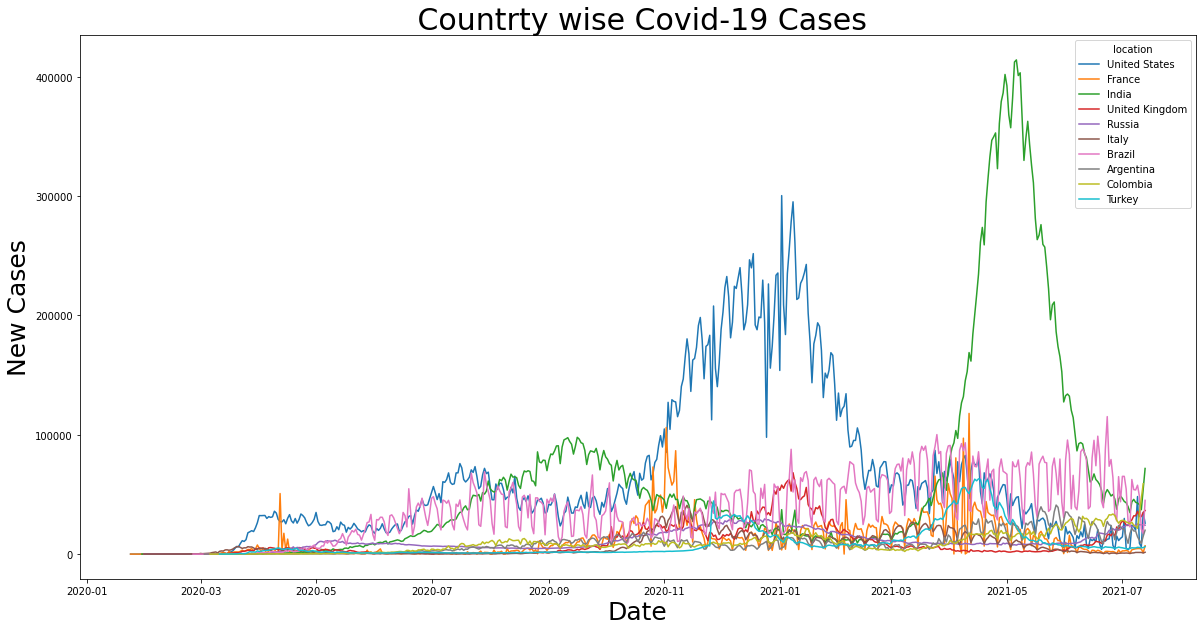

In [36]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y="y",hue="location", data=df_new_cases);
plt.xlabel("Date", size=25)
plt.ylabel("New Cases", size=25)
plt.title(" Countrty wise Covid-19 Cases", size=30)

# 2. FORCASTING OF INDIA:


1.   New Cases
2.   New Deaths
3.   People fully vaccinated



In [37]:
dfi = df.copy()
# select rows with location India
dfi = dfi.query('location=="India"')
dfi

,iso_code,continent,location,ds,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
42294,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42295,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42296,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42297,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42298,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42820,IND,Asia,India,2021-07-09,30795716.0,42766.0,407145.0,1206.0,1790708.0,427016605.0,0.023,43.5,NaN,NaN,NaN,NaN
42821,IND,Asia,India,2021-07-10,30837222.0,41506.0,408040.0,895.0,2025365.0,429041970.0,0.023,43.3,376032586.0,303171498.0,72861088.0,NaN
42822,IND,Asia,India,2021-07-11,30874376.0,37154.0,408764.0,724.0,1843500.0,430885470.0,0.023,43.7,377352501.0,304018852.0,73333649.0,1319915.0
42823,IND,Asia,India,2021-07-12,30874376.0,0.0,408764.0,0.0,1432343.0,432317813.0,0.020,49.3,381467646.0,306612781.0,74854865.0,4115145.0


In [38]:
dfi.describe()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
count,5.310000e+02,531.000000,490.000000,490.000000,4.620000e+02,4.720000e+02,480.000000,480.000000,1.740000e+02,1.740000e+02,1.450000e+02,1.680000e+02
mean,8.604992e+06,58278.996234,125666.787755,839.604082,9.205164e+05,1.423447e+08,0.065017,24.021042,1.272992e+08,1.040684e+08,2.787705e+07,2.192197e+06
std,9.107816e+06,85284.160601,110807.248674,1082.774271,6.502660e+05,1.274078e+08,0.047058,15.544654,1.147122e+08,9.275699e+07,2.152780e+07,1.871428e+06
min,1.000000e+00,0.000000,1.000000,-1.000000,1.570000e+02,6.500000e+03,0.016000,4.400000,0.000000e+00,0.000000e+00,7.668000e+03,5.671000e+03
25%,2.920700e+05,9215.000000,22798.250000,142.750000,3.660248e+05,1.429795e+07,0.031750,11.800000,1.443948e+07,1.194789e+07,7.863441e+06,5.671980e+05
50%,7.706946e+06,30548.000000,127846.000000,480.500000,8.984600e+05,1.252677e+08,0.048500,20.650000,1.098563e+08,9.617248e+07,2.662116e+07,2.097912e+06
75%,1.114822e+07,64476.000000,158566.750000,976.250000,1.170018e+06,2.276258e+08,0.084000,31.650000,2.082711e+08,1.652382e+08,4.476534e+07,3.111677e+06
max,3.094615e+07,414188.000000,411406.000000,7374.000000,3.740296e+06,4.340581e+08,0.227000,62.000000,3.876979e+08,3.113875e+08,7.631040e+07,1.092046e+07


### 1. New Cases

FORCASTING NEW CASES

*   no null
*   no -ve



In [39]:
dfinc = dfi[['ds','new_cases']]
dfinc

,ds,new_cases
42294,2020-01-30,1.0
42295,2020-01-31,0.0
42296,2020-02-01,0.0
42297,2020-02-02,1.0
42298,2020-02-03,1.0
...,...,...
42820,2021-07-09,42766.0
42821,2021-07-10,41506.0
42822,2021-07-11,37154.0
42823,2021-07-12,0.0


In [40]:
dfinc = dfinc.rename(columns = {'new_cases':'y'})
dfinc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 42294 to 42824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      531 non-null    datetime64[ns]
 1   y       531 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.4 KB


In [41]:
dfinc['y'] = dfinc['y'].astype(int)
dfinc['ds'] = pd.to_datetime(dfinc['ds'])
dfinc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 42294 to 42824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      531 non-null    datetime64[ns]
 1   y       531 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.4 KB


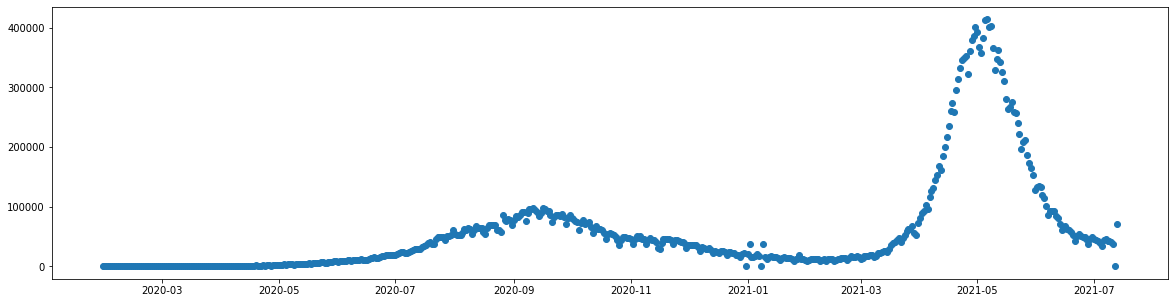

In [42]:
# Plotting
plt.figure(figsize = (20,5))
plt.scatter(dfinc['ds'],dfinc['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds          trend  ...  multiplicative_terms_upper           yhat
0   2020-11-06   47674.952242  ...                         0.0   49975.626888
1   2020-11-07   47157.817523  ...                         0.0   50512.120489
2   2020-11-08   46640.682804  ...                         0.0   45498.834685
3   2020-11-09   46123.548085  ...                         0.0   35793.560338
4   2020-11-10   45606.413367  ...                         0.0   45653.057192
..         ...            ...  ...                         ...            ...
275 2021-08-08  -90471.962535  ...                         0.0  -91613.810653
276 2021-08-09  -93929.461553  ...                         0.0 -104259.449301
277 2021-08-10  -97386.960571  ...                         0.0  -97340.316746
278 2021-08-11 -100844.459589  ...                         0.0  -97341.779135
279 2021-08-12 -104301.958607  ...                         0.0 -102034.424632

[280 rows x 16 columns]


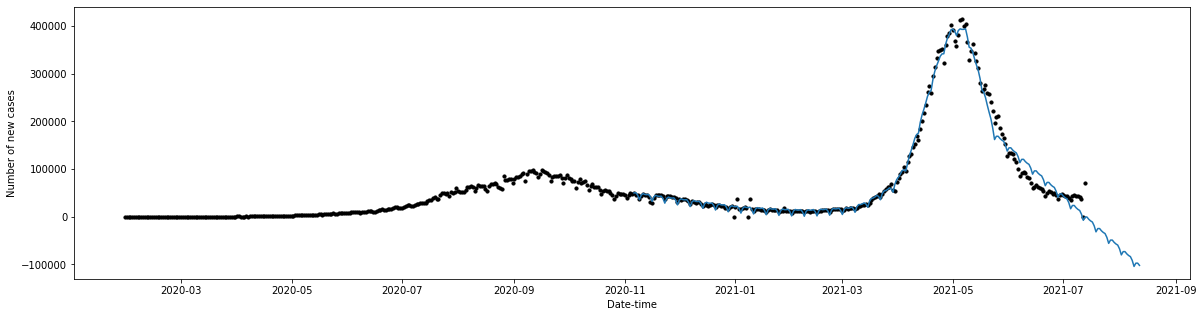

In [43]:
dfinc2 = dfinc.tail(250)
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.4)
model.fit(dfinc2)
x=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(dfinc['ds'],dfinc['y'],s=10,c='k')
plt.plot(forecast['ds'], forecast['yhat'])
plt.xlabel('Date-time')
plt.ylabel('Number of new cases')
print(forecast)

Text(123.0, 0.5, 'Number of new cases')

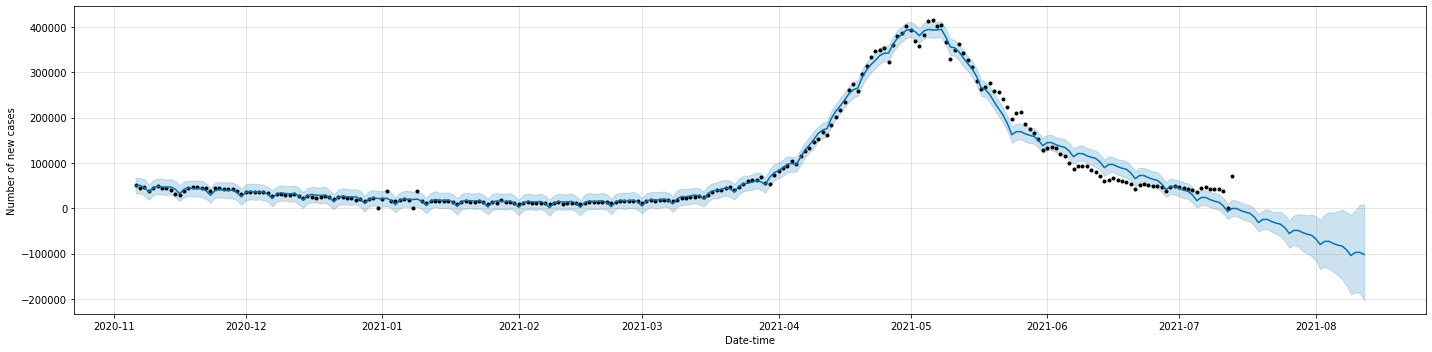

In [44]:
model.plot(forecast,figsize=(20,5));
plt.xlabel('Date-time')
plt.ylabel('Number of new cases')

Figure(1440x576)


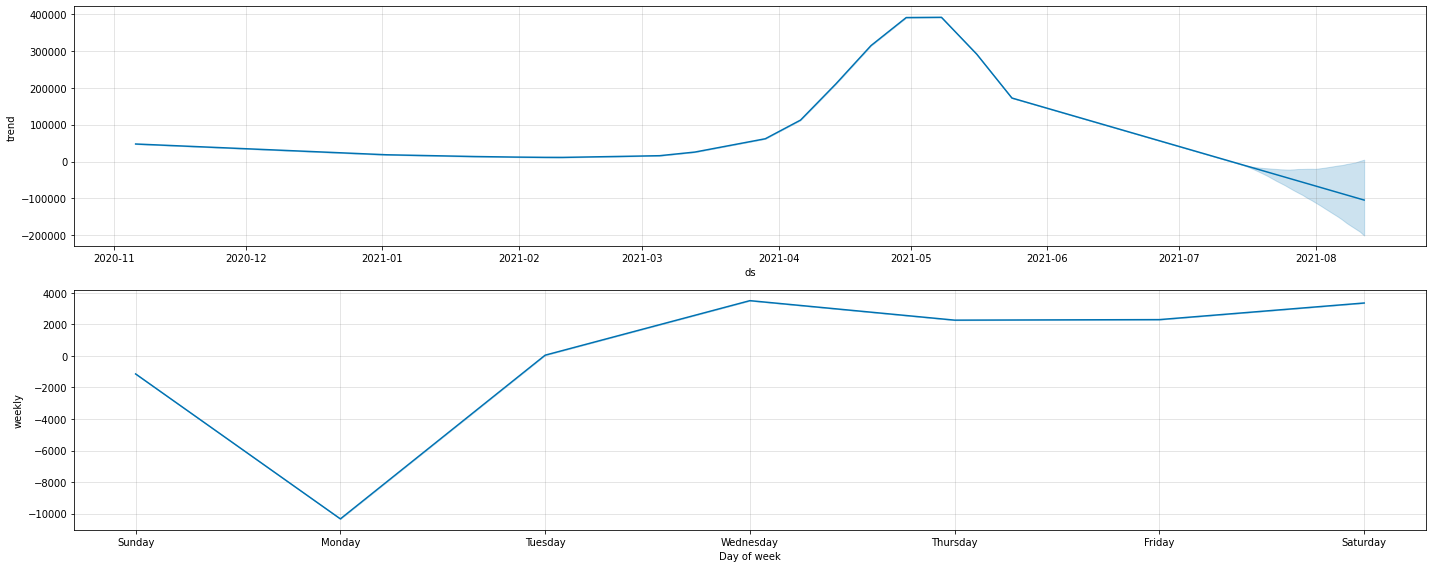

In [45]:
b = model.plot_components(forecast, figsize=(20,8));
print(b)

## 2.  New Deaths

In [46]:
dfindc = dfi[['ds','new_deaths']]

In [47]:
dfindc = dfindc.dropna()
dfindc

,ds,new_deaths
42335,2020-03-11,1.0
42336,2020-03-12,0.0
42337,2020-03-13,1.0
42338,2020-03-14,0.0
42339,2020-03-15,0.0
...,...,...
42820,2021-07-09,1206.0
42821,2021-07-10,895.0
42822,2021-07-11,724.0
42823,2021-07-12,0.0


In [48]:
dfindc = dfindc.loc[dfindc['new_deaths']>=0]
dfindc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 42335 to 42824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          489 non-null    datetime64[ns]
 1   new_deaths  489 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 42335 to 42824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      489 non-null    datetime64[ns]
 1   y       489 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB
None


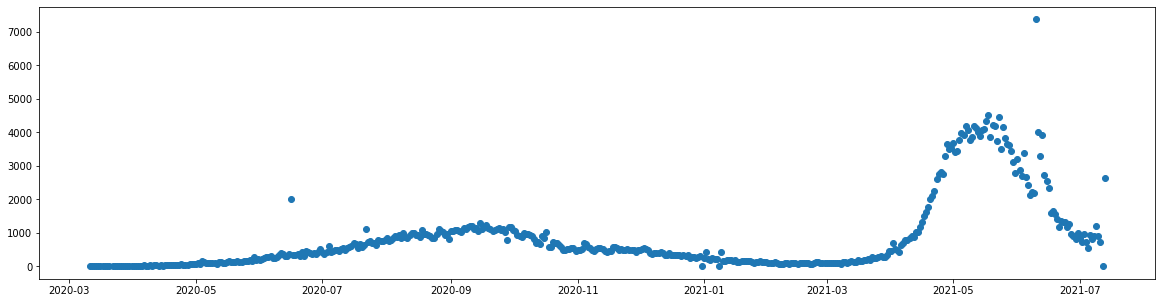

In [49]:
dfindc = dfindc.rename(columns = {'new_deaths':'y'})
print(dfindc.info())

dfindc['y'] = dfindc['y'].astype(int)
dfindc['ds'] = pd.to_datetime(dfindc['ds'])

#plotting given data of death cases
plt.figure(figsize = (20,5))
plt.scatter(dfindc['ds'],dfindc['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        trend  ...  multiplicative_terms_upper         yhat
0   2020-11-26   476.559674  ...                         0.0   568.438903
1   2020-11-27   470.624958  ...                         0.0   510.265341
2   2020-11-28   464.690242  ...                         0.0   471.633966
3   2020-11-29   458.755526  ...                         0.0   429.345196
4   2020-11-30   452.820810  ...                         0.0   312.370243
..         ...          ...  ...                         ...          ...
255 2021-08-08 -1410.036893  ...                         0.0 -1439.447223
256 2021-08-09 -1479.377170  ...                         0.0 -1619.827737
257 2021-08-10 -1548.717446  ...                         0.0 -1484.487077
258 2021-08-11 -1618.057723  ...                         0.0 -1650.890531
259 2021-08-12 -1687.398000  ...                         0.0 -1595.518771

[260 rows x 16 columns]


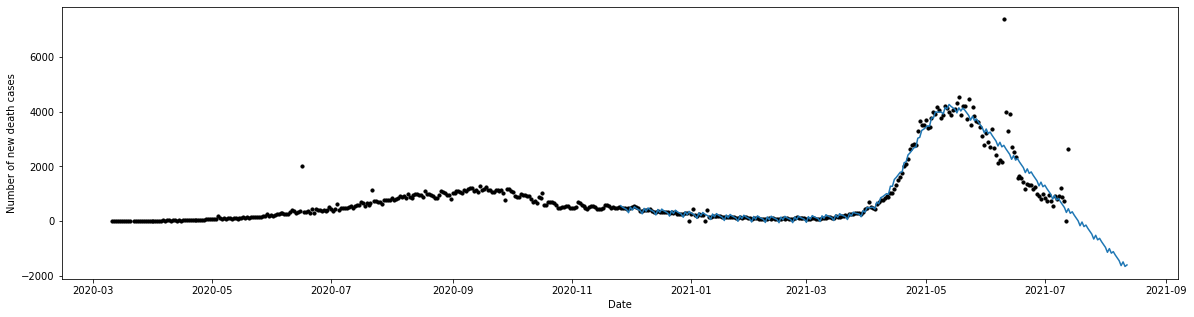

In [50]:
# Forecasting

from fbprophet import Prophet
model2=Prophet(changepoint_prior_scale=0.5)
model2.fit(dfindc.tail(230))
x=model2.make_future_dataframe(periods=30,freq='D')
forecast2=model2.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(dfindc['ds'],dfindc['y'],s=10,c='k')
plt.plot(forecast2['ds'], forecast2['yhat'])
plt.xlabel('Date')
plt.ylabel('Number of new death cases')
print(forecast2)


Text(135.5, 0.5, 'Number of new death cases')

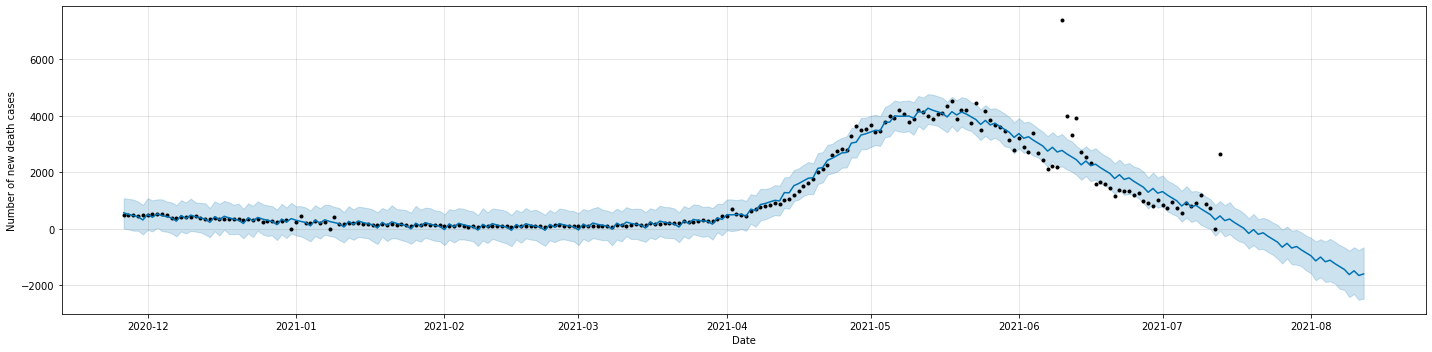

In [51]:
model2.plot(forecast2,figsize=(20,5));
plt.xlabel('Date')
plt.ylabel('Number of new death cases')

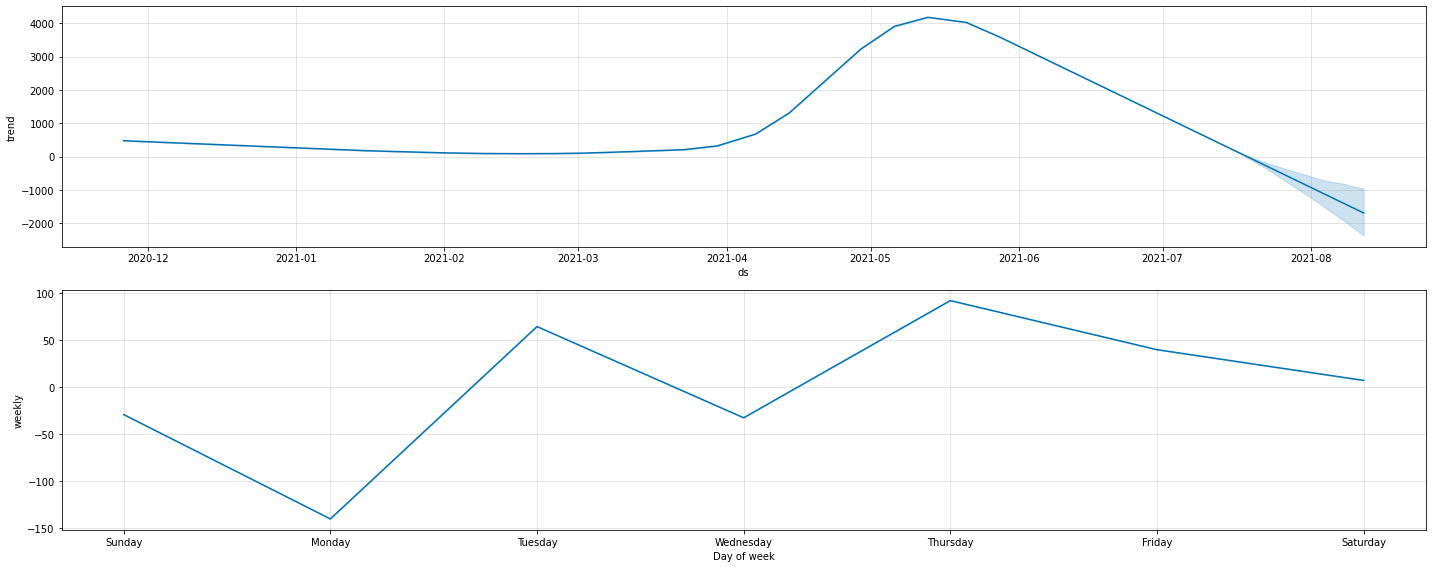

In [52]:
model2.plot_components(forecast2, figsize=(20,8));

## 3. People Fully Vaccinated

In [53]:
dfipvf = dfi[['ds','people_fully_vaccinated']]
dfipvf = dfipvf.dropna()
dfipvf

,ds,people_fully_vaccinated
42674,2021-02-13,7668.0
42676,2021-02-15,98118.0
42677,2021-02-16,216339.0
42678,2021-02-17,342116.0
42679,2021-02-18,464932.0
...,...,...
42819,2021-07-08,70312309.0
42821,2021-07-10,72861088.0
42822,2021-07-11,73333649.0
42823,2021-07-12,74854865.0


In [54]:
dfipvf = dfipvf.loc[dfipvf['people_fully_vaccinated']>=0]
dfipvf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 42674 to 42824
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ds                       145 non-null    datetime64[ns]
 1   people_fully_vaccinated  145 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 42674 to 42824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      145 non-null    datetime64[ns]
 1   y       145 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB
None


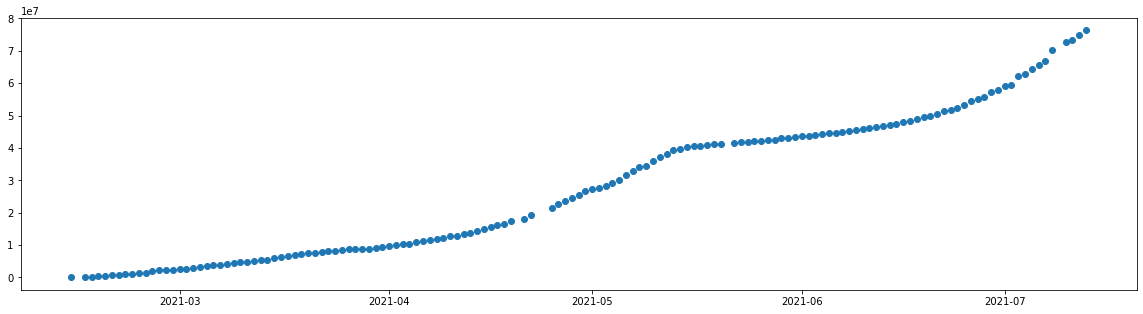

In [55]:
dfipvf = dfipvf.rename(columns = {'people_fully_vaccinated':'y'})
print(dfipvf.info())

dfipvf['y'] = dfipvf['y'].astype(int)
dfipvf['ds'] = pd.to_datetime(dfipvf['ds'])

#plotting given data of death cases
plt.figure(figsize = (20,5))
plt.scatter(dfipvf['ds'],dfipvf['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        trend  ...  multiplicative_terms_upper         yhat
0   2020-11-26   476.559674  ...                         0.0   568.438903
1   2020-11-27   470.624958  ...                         0.0   510.265341
2   2020-11-28   464.690242  ...                         0.0   471.633966
3   2020-11-29   458.755526  ...                         0.0   429.345196
4   2020-11-30   452.820810  ...                         0.0   312.370243
..         ...          ...  ...                         ...          ...
255 2021-08-08 -1410.036893  ...                         0.0 -1439.447223
256 2021-08-09 -1479.377170  ...                         0.0 -1619.827737
257 2021-08-10 -1548.717446  ...                         0.0 -1484.487077
258 2021-08-11 -1618.057723  ...                         0.0 -1650.890531
259 2021-08-12 -1687.398000  ...                         0.0 -1595.518771

[260 rows x 16 columns]


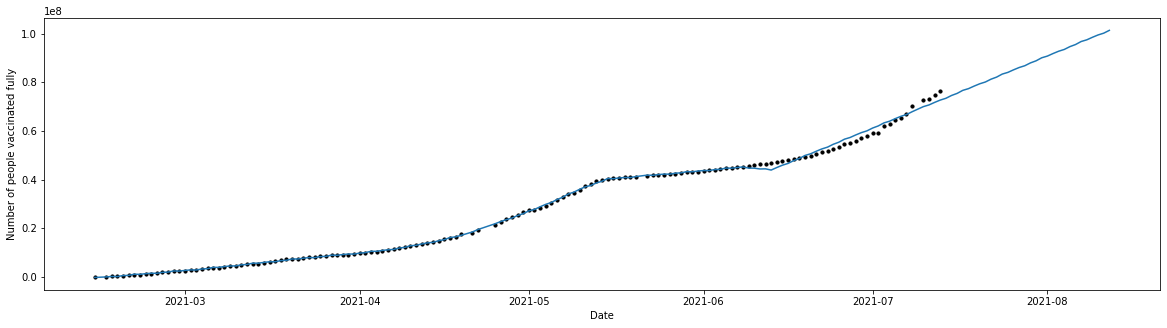

In [56]:
from fbprophet import Prophet
model3=Prophet(changepoint_prior_scale=0.5)
model3.fit(dfipvf.tail(230))
x=model3.make_future_dataframe(periods=30,freq='D')
forecast3=model3.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(dfipvf['ds'],dfipvf['y'],s=10,c='k')
plt.plot(forecast3['ds'], forecast3['yhat'])
plt.xlabel('Date')
plt.ylabel('Number of people vaccinated fully')
print(forecast2)

Text(153.125, 0.5, 'Number of people vaccinated fully')

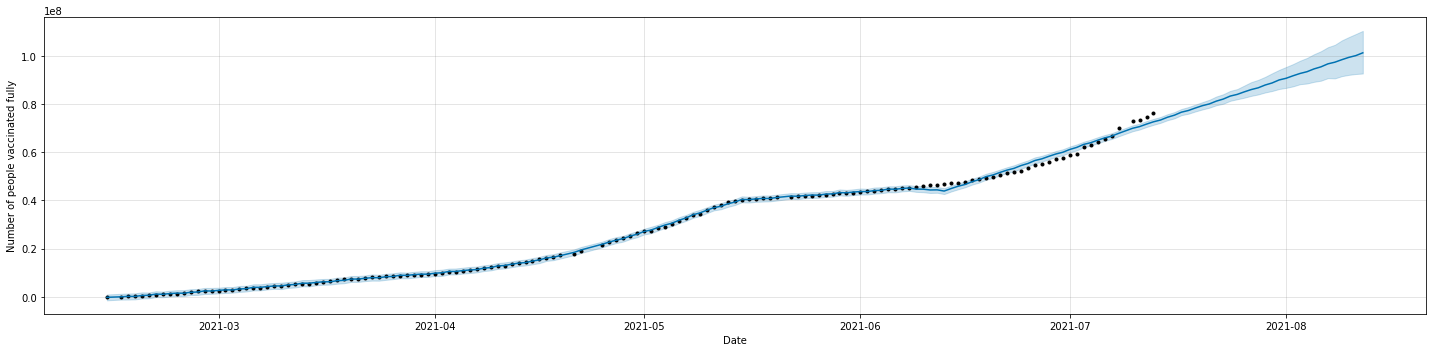

In [57]:
model3.plot(forecast3,figsize=(20,5));
plt.xlabel('Date')
plt.ylabel('Number of people vaccinated fully')

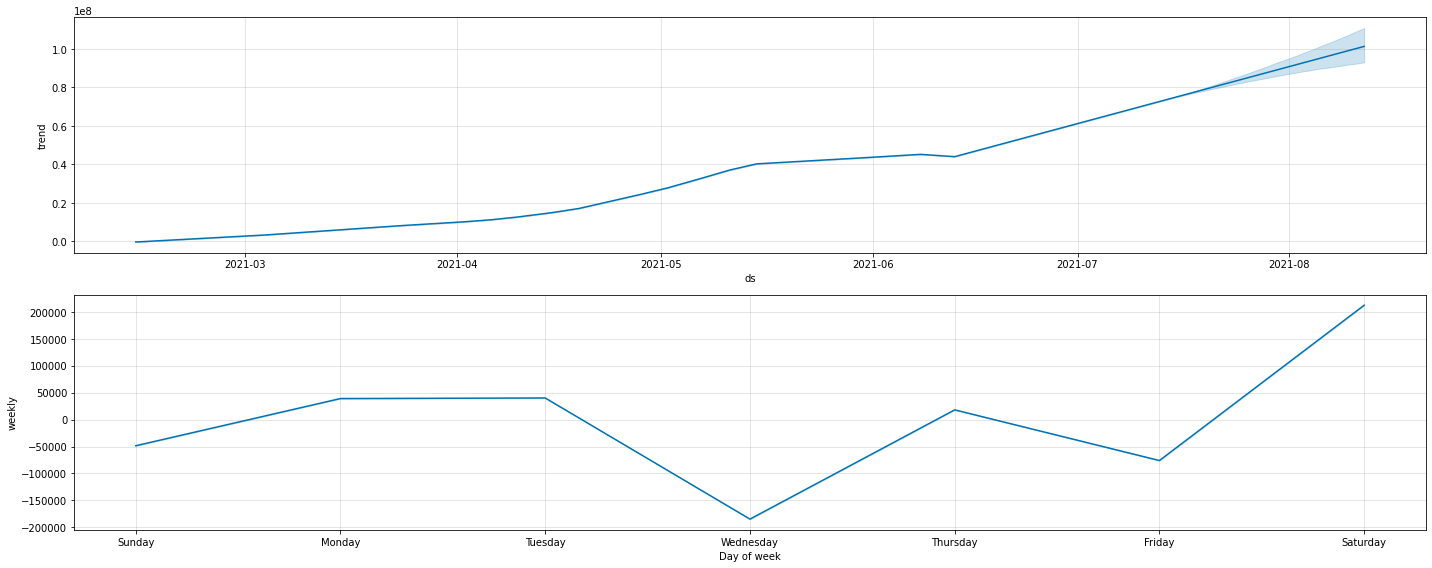

In [58]:
model3.plot_components(forecast3, figsize=(20,8));